In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# --- Section 1: Data Loading and Preprocessing ---
def load_and_preprocess_data():
    print("="*60)
    print("--- STAGE 1: Loading and Preprocessing Data ---")
    print("="*60)

    columns = [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root',
        'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
        'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
        'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
        'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate', 'label', 'difficulty'
    ]

    print("-> Loading 'KDDTrain+.txt' and 'KDDTest+.txt'...")
    try:
        df_train = pd.read_csv('KDDTrain+.txt', header=None, names=columns)
        df_test = pd.read_csv('KDDTest+.txt', header=None, names=columns)
        print("   Dataset loaded successfully.")
    except FileNotFoundError:
        print("\n   ERROR: NSL-KDD dataset files not found. Please download them.")
        exit()

    print("-> Performing initial cleanup...")
    df_train = df_train.drop('difficulty', axis=1)
    df_test = df_test.drop('difficulty', axis=1)
    print("   'difficulty' column removed.")

    df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
    df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)
    print("   'label' column converted to binary: 0 for Normal, 1 for Attack.")

    X_train, y_train = df_train.drop('label', axis=1), df_train['label']
    X_test, y_test = df_test.drop('label', axis=1), df_test['label']

    print(f"\n   Original training data shape: {X_train.shape}")
    print(f"   Original testing data shape: {X_test.shape}")
    print("\n   Original Training Set Label Distribution:")
    print(y_train.value_counts(normalize=True))

    print("\n-> Setting up preprocessing pipeline...")
    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=np.number).columns
    print(f"   Identified {len(categorical_features)} categorical features: {list(categorical_features)}")
    print(f"   Identified {len(numerical_features)} numerical features.")

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    print("\n-> Applying preprocessing...")
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("   OneHotEncoding applied to categorical features.")
    print("   MinMaxScaler applied to numerical features.")
    print(f"   Shape of data after preprocessing: {X_train_processed.shape}")
    print("\n--- STAGE 1 COMPLETE ---")

    return X_train_processed, y_train.values, X_test_processed, y_test.values


In [ ]:
# --- Section 1: Data Loading and Preprocessing ---
def load_and_preprocess_data():
    print("="*60)
    print("--- STAGE 1: Loading and Preprocessing Data ---")
    print("="*60)

    columns = [
        'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
        'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
        'num_compromised', 'root_shell', 'su_attempted', 'num_root',
        'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
        'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
        'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
        'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate', 'label', 'difficulty'
    ]

    print("-> Loading 'KDDTrain+.txt' and 'KDDTest+.txt'...")
    try:
        df_train = pd.read_csv('KDDTrain+.txt', header=None, names=columns)
        df_test = pd.read_csv('KDDTest+.txt', header=None, names=columns)
        print("   Dataset loaded successfully.")
    except FileNotFoundError:
        print("\n   ERROR: NSL-KDD dataset files not found. Please download them.")
        exit()

    print("-> Performing initial cleanup...")
    df_train = df_train.drop('difficulty', axis=1)
    df_test = df_test.drop('difficulty', axis=1)
    print("   'difficulty' column removed.")

    df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
    df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)
    print("   'label' column converted to binary: 0 for Normal, 1 for Attack.")

    X_train, y_train = df_train.drop('label', axis=1), df_train['label']
    X_test, y_test = df_test.drop('label', axis=1), df_test['label']

    print(f"\n   Original training data shape: {X_train.shape}")
    print(f"   Original testing data shape: {X_test.shape}")
    print("\n   Original Training Set Label Distribution:")
    print(y_train.value_counts(normalize=True))

    print("\n-> Setting up preprocessing pipeline...")
    categorical_features = X_train.select_dtypes(include=['object']).columns
    numerical_features = X_train.select_dtypes(include=np.number).columns
    print(f"   Identified {len(categorical_features)} categorical features: {list(categorical_features)}")
    print(f"   Identified {len(numerical_features)} numerical features.")

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )

    print("\n-> Applying preprocessing...")
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    print("   OneHotEncoding applied to categorical features.")
    print("   MinMaxScaler applied to numerical features.")
    print(f"   Shape of data after preprocessing: {X_train_processed.shape}")
    print("\n--- STAGE 1 COMPLETE ---")

    return X_train_processed, y_train.values, X_test_processed, y_test.values


In [ ]:
# --- Section 2: GAN Model for Data Generation ---
def train_gan(attack_data, latent_dim, input_dim):
    print("\n" + "="*60)
    print("--- STAGE 2: Training GAN to Generate Synthetic Data ---")
    print("="*60)
    print(f"-> The GAN will be trained ONLY on the {attack_data.shape[0]} attack samples.")

    gan_epochs = 1000
    batch_size = 128

    # Build Models
    generator = Sequential([Dense(128, input_dim=latent_dim), LeakyReLU(0.2), Dense(256), LeakyReLU(0.2), Dense(input_dim, activation='tanh')], name="Generator")
    discriminator = Sequential([Dense(256, input_dim=input_dim), LeakyReLU(0.2), Dropout(0.4), Dense(1, activation='sigmoid')], name="Discriminator")
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    z = Input(shape=(latent_dim,))
    generated_sample = generator(z)
    discriminator.trainable = False
    validity = discriminator(generated_sample)
    combined_gan = Model(z, validity)
    combined_gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

    print("   Generator and Discriminator models built.")
    print("-> Starting adversarial training loop...")

    start_time = time.time()
    for epoch in range(gan_epochs):
        # Train Discriminator
        idx = np.random.randint(0, attack_data.shape[0], batch_size)
        real_samples = attack_data[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_samples = generator.predict(noise, verbose=0)
        discriminator.train_on_batch(real_samples, np.ones((batch_size, 1)))
        discriminator.train_on_batch(fake_samples, np.zeros((batch_size, 1)))

        # Train Generator
        combined_gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if (epoch + 1) % 500 == 0:
            print(f"   GAN Epoch {epoch+1}/{gan_epochs} completed...")

    end_time = time.time()
    print(f"   GAN training finished in {end_time - start_time:.2f} seconds.")
    print("\n--- STAGE 2 COMPLETE ---")
    return generator

In [ ]:
# --- Section 3: Algorithm 1 Implementation ---
def train_autoencoder_on_augmented_data(generator, X_train, y_train):
    print("\n" + "="*60)
    print("--- STAGE 3: Implementing Algorithm 1 (Autoencoder Training) ---")
    print("="*60)

    num_normal = np.sum(y_train == 0)
    num_attack = np.sum(y_train == 1)
    num_to_generate = num_normal - num_attack

    print("-> Creating augmented dataset (D_tilde from the paper)...")
    if num_to_generate <= 0:
        print("   Dataset is already balanced. Skipping augmentation.")
        X_train_augmented = X_train
    else:
        print(f"   Original dataset has {num_normal} normal vs {num_attack} attack samples.")
        print(f"   Generating {num_to_generate} new synthetic attack samples using the trained GAN...")
        noise = np.random.normal(0, 1, (num_to_generate, 100)) # latent_dim=100
        synthetic_attacks = generator.predict(noise)
        print(f"   Successfully generated {synthetic_attacks.shape[0]} new samples.")

        X_train_augmented = np.vstack([X_train, synthetic_attacks])
        print(f"   Original and synthetic data combined. New augmented dataset shape: {X_train_augmented.shape}")

    print("\n-> Building the Autoencoder model...")
    input_dim = X_train_augmented.shape[1]
    encoding_dim = 64

    input_layer = Input(shape=(input_dim,))
    encoder_layer = Dense(encoding_dim, activation='relu')(input_layer)
    decoder_layer = Dense(input_dim, activation='sigmoid')(encoder_layer)
    autoencoder = Model(input_layer, decoder_layer, name="Autoencoder")
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    print("   Autoencoder model built.")

    print("\n-> Training Autoencoder on the full augmented dataset...")
    autoencoder.fit(X_train_augmented, X_train_augmented, epochs=50, batch_size=256, shuffle=True, verbose=1)
    print("   Autoencoder training complete.")

    print("\n-> Extracting the trained Encoder part (theta_enc from the paper)...")
    encoder = Model(input_layer, encoder_layer, name="Encoder")
    print("   Expert Encoder is ready.")
    print("\n--- STAGE 3 (ALGORITHM 1) COMPLETE ---")
    return encoder, X_train_augmented, y_train



In [ ]:
# --- Section 4: Algorithm 2 Implementation ---
def train_final_classifier(encoder, X_train_augmented, y_train, X_test, y_test):
    print("\n" + "="*60)
    print("--- STAGE 4: Implementing Algorithm 2 (Final Classifier Training) ---")
    print("="*60)

    num_synthetic = X_train_augmented.shape[0] - len(y_train)
    y_train_augmented = np.concatenate([y_train, np.ones(num_synthetic)])

    print(f"-> Re-created labels for augmented dataset. Total training samples: {len(y_train_augmented)}")

    print("\n-> Freezing the weights of the expert Encoder...")
    encoder.trainable = False
    print("   Encoder is now non-trainable. It will only act as a feature extractor.")

    print("\n-> Building the final model using the Functional API...")

    input_dim = encoder.input_shape[1]
    main_input = Input(shape=(input_dim,))

    encoded_features = encoder(main_input)

    x = Dense(64, activation='relu')(encoded_features)
    x = Dropout(0.5)(x)
    final_output = Dense(1, activation='sigmoid')(x)

    final_model = Model(inputs=main_input, outputs=final_output, name="Final_Classifier")

    final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print("   Final model architecture built successfully.")

    print("\n-> Training the final model...")
    print("   NOTE: Only the weights of the new classifier head will be updated.")
    final_model.fit(
        X_train_augmented, y_train_augmented,
        epochs=25,
        batch_size=256,
        validation_data=(X_test, y_test),
        shuffle=True,
        verbose=1,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
    )
    print("   Final classifier training complete.")
    print("\n--- STAGE 4 (ALGORITHM 2) COMPLETE ---")
    return final_model



--- STAGE 1: Loading and Preprocessing Data ---
-> Loading 'KDDTrain+.txt' and 'KDDTest+.txt'...
   Dataset loaded successfully.
-> Performing initial cleanup...
   'difficulty' column removed.
   'label' column converted to binary: 0 for Normal, 1 for Attack.

   Original training data shape: (125973, 41)
   Original testing data shape: (22544, 41)

   Original Training Set Label Distribution:
label
0    0.534583
1    0.465417
Name: proportion, dtype: float64

-> Setting up preprocessing pipeline...
   Identified 3 categorical features: ['protocol_type', 'service', 'flag']
   Identified 38 numerical features.

-> Applying preprocessing...
   OneHotEncoding applied to categorical features.
   MinMaxScaler applied to numerical features.
   Shape of data after preprocessing: (125973, 122)

--- STAGE 1 COMPLETE ---

--- STAGE 2: Training GAN to Generate Synthetic Data ---
-> The GAN will be trained ONLY on the 58630 attack samples.
   Generator and Discriminator models built.
-> Starting 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


   GAN Epoch 500/2000 completed...
   GAN Epoch 1000/2000 completed...
   GAN Epoch 1500/2000 completed...
   GAN Epoch 2000/2000 completed...
   GAN training finished in 251.04 seconds.

--- STAGE 2 COMPLETE ---

--- STAGE 3: Implementing Algorithm 1 (Autoencoder Training) ---
-> Creating augmented dataset (D_tilde from the paper)...
   Original dataset has 67343 normal vs 58630 attack samples.
   Generating 8713 new synthetic attack samples using the trained GAN...
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
   Successfully generated 8713 new samples.
   Original and synthetic data combined. New augmented dataset shape: (134686, 122)

-> Building the Autoencoder model...
   Autoencoder model built.

-> Training Autoencoder on the full augmented dataset...
Epoch 1/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1033
Epoch 2/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0304
Epoch 3/50
527/527 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0291
Epoch 4/50
527/527 ━━━━━━━━━━━━━━━

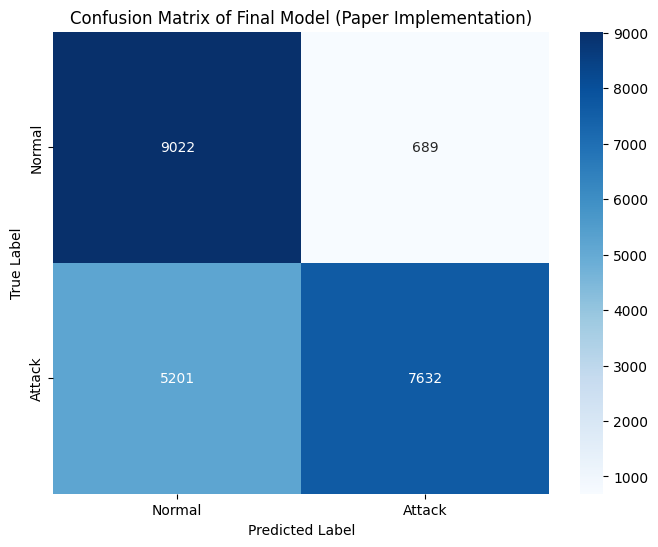

   Displaying Confusion Matrix plot.

--- PROJECT EXECUTION COMPLETE ---


In [ ]:
X_train, y_train, X_test, y_test = load_and_preprocess_data()

X_train_attacks = X_train[y_train == 1]
input_dim = X_train.shape[1]
latent_dim = 100
generator = train_gan(X_train_attacks, latent_dim, input_dim)

encoder, X_train_augmented, y_train_for_aug = train_autoencoder_on_augmented_data(generator, X_train, y_train)

final_model = train_final_classifier(encoder, X_train_augmented, y_train_for_aug, X_test, y_test)

print("\n" + "="*60)
print("--- STAGE 5: Final Evaluation on Unseen Test Data ---")
print("="*60)

loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"\n   Test Accuracy: {accuracy:.4f}")
print(f"   Test Loss: {loss:.4f}")

y_pred = (final_model.predict(X_test) > 0.5).astype(int)
print("\n   Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'Attack (1)']))

print("\n   Generating Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix of Final Model (Paper Implementation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("   Displaying Confusion Matrix plot.")
print("\n--- PROJECT EXECUTION COMPLETE ---")